### Project : 
## Human Activity Recognition : Predictions using ML Models

In [30]:
# Importing necessary libraries

import numpy as np
import pandas as pd

In [31]:
# Reading data from CSV file

train = pd.read_csv('./UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('./UCI_HAR_Dataset/csv_files/test.csv')

In [32]:
# Checking the shape of train and test

print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In [33]:
# Displaying first 5 rows of training data
train.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,Standing


In [34]:
# Displaying first 5 rows of testing data

test.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_Name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,Standing
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,Standing
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,Standing
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,Standing
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,Standing


In [35]:
# Getting X_train and y_train from train data

X_train = train.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
y_train = train.Activity


In [36]:
test["Activity"].value_counts()
test["Activity_Name"].value_counts()

Activity_Name
Walking              543
Standing             530
Laying               516
Sitting              489
Walking_Upstair      458
Walking_Downstair    411
Name: count, dtype: int64

In [37]:
# Getting X_test and y_test from test data

X_test = test.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
y_test = test.Activity

In [38]:
# Displaying the shape of training and testing data

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [39]:
# Let's use Linear discriminant analysis to find features that classifies the label well

# Importing libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [40]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [41]:
# Displaying the shape of training and testing data

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 5),(7352,))
X_test  and y_test  : ((2947, 5),(2947,))


## Let's define some generic functions to create ML models

### Function to plot Confusion Matrix

In [42]:
# Importing necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [43]:
# Creating a function to print text in Bold and in given color

from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [44]:
# Function to plot Confusion Matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [45]:
# Generic function to any model

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # Let's create an empty dictionary to be returned by the function
    results = dict()
    
    # Let's calculate & print the total training time
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    printmd('Training_time(HH:MM:SS.ms) - {}'.format(results['training_time']), color='blue')
        
    # Let's calculate & print the test time
    
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    printmd('testing time(HH:MM:SS:ms) - {}'.format(results['testing_time']), color='blue')
    results['predicted'] = y_pred
   
    # Let's calculate the Accuracy of Model
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    printmd('**Accuracy:**', color='blue')
    print('{}'.format(accuracy))
        
    # Let's get the Confusion Matrix
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    
    printmd('**Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=labels, title='Normalized confusion matrix', cmap=plt.cm.YlGn, )
    plt.show()
        
    # Plotting Normalized Confusion Matrix
    
    printmd('**Normalized Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # PLotting classification report
    
    printmd('**Classifiction Report**', color='blue')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    # Adding the trained model to the results
    
    results['model'] = model
    
    return results

In [46]:
def print_grid_search_attributes(model):
    
    # Let's print the best estimator that gave highest score
    
    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # Let's print the best parameters that gave best results
    
    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    #  Let's print the number of cross validation splits
    
    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # Let's print the Best score of the best estimator
    
    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

## Applying various Machine learning model with Grid-Search

### 1. Logistic Regression

In [47]:
# Importing necessary libraries

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [48]:
# Creating a list labels to be added to plots

labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Best Parameters:  {'C': 20, 'penalty': 'l2'}
Best Estimator:  LogisticRegression(C=20)
Best Score:  0.9838137784005513
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.97      0.97       471
           3       1.00      0.98      0.99       420
           4       0.96      0.88      0.91       491
           5       0.90      0.96      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
 [[492   4   0   0   0   0]
 [ 16 455   0   0   0   0]
 [  1   7 412   0   0   0]
 [  0   1   0 430  60   0]
 [  0   0   0  19 513   0]
 [  0   0   0   0   0 537]]


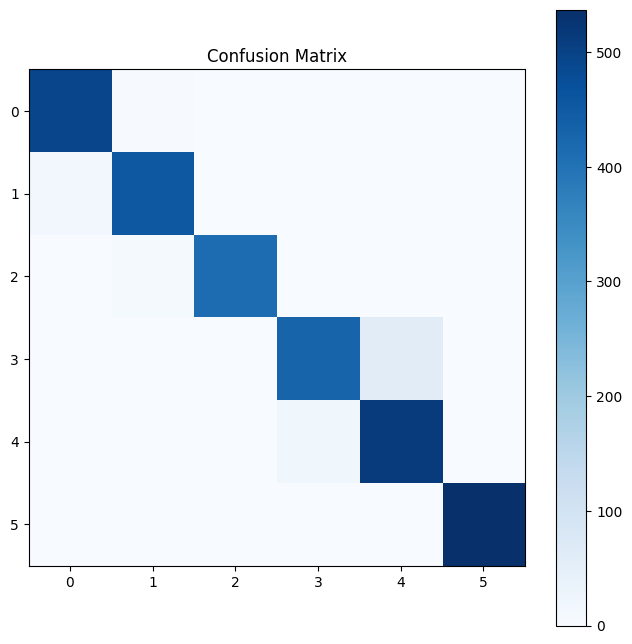

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Let's define the parameters to be tuned
parameters = {'C': [20, 25, 30, 35, 40], 'penalty': ['l2']}

# Let's initiate the model
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
log_reg_grid_results = log_reg_grid.fit(X_train, y_train)

# Printing the best attributes of the model
print("Best Parameters: ", log_reg_grid_results.best_params_)
print("Best Estimator: ", log_reg_grid_results.best_estimator_)
print("Best Score: ", log_reg_grid_results.best_score_)

# Perform predictions on the test set
y_pred = log_reg_grid_results.predict(X_test)


# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


### 2. Decision Tree

In [50]:
# Importing libraries

from sklearn.tree import DecisionTreeClassifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters:  {'max_depth': 5}
Best Estimator:  DecisionTreeClassifier(max_depth=5)
Best Score:  0.9829986542543597
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.99      0.96       496
           2       0.98      0.95      0.96       471
           3       1.00      0.94      0.97       420
           4       0.94      0.87      0.90       491
           5       0.89      0.95      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

Confusion Matrix:
 [[493   3   0   0   0   0]
 [ 23 448   0   0   0   0]
 [ 20   7 393   0   0   0]
 [  0   0   0 426  65   0]
 [  0   0   0  25 507   0]
 [  0   0   0   0   0 537]]


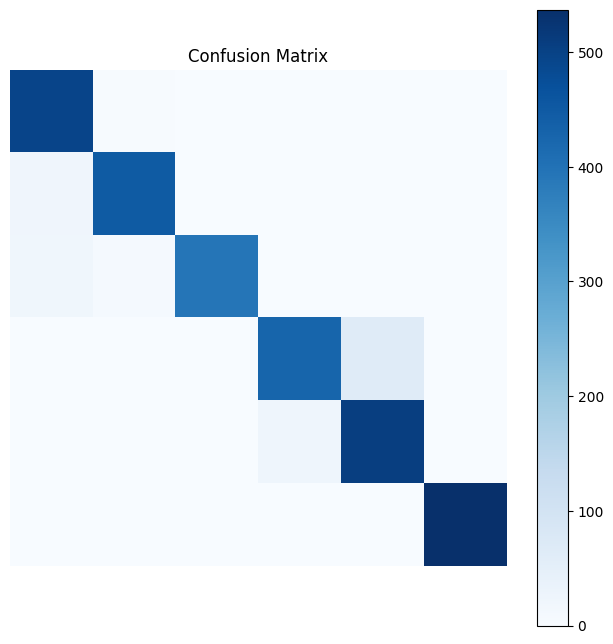

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Let's define the parameters to be tuned
parameters = {'max_depth': np.arange(4, 10, 1)}

# Let's initiate the model
dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree, param_grid=parameters, verbose=1, n_jobs=-1)
dtree_grid_results = dtree_grid.fit(X_train, y_train)

# Printing the best attributes of the model
print("Best Parameters: ", dtree_grid_results.best_params_)
print("Best Estimator: ", dtree_grid_results.best_estimator_)
print("Best Score: ", dtree_grid_results.best_score_)

# Perform predictions on the test set
y_pred = dtree_grid_results.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.axis('off')
plt.show()


### 3. Random Forest Classifier

In [52]:
# Importing libraries

from sklearn.ensemble import RandomForestClassifier

Best Parameters:  {'max_depth': 6, 'n_estimators': 70}
Best Estimator:  RandomForestClassifier(max_depth=6, n_estimators=70)
Best Score:  0.9859905566577412
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.98      0.97      0.98       471
           3       1.00      0.98      0.99       420
           4       0.96      0.86      0.91       491
           5       0.88      0.97      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

Confusion Matrix:
 [[491   4   1   0   0   0]
 [ 12 458   1   0   0   0]
 [  2   5 413   0   0   0]
 [  0   1   0 420  70   0]
 [  0   0   0  17 515   0]
 [  0   0   0   0   0 537]]


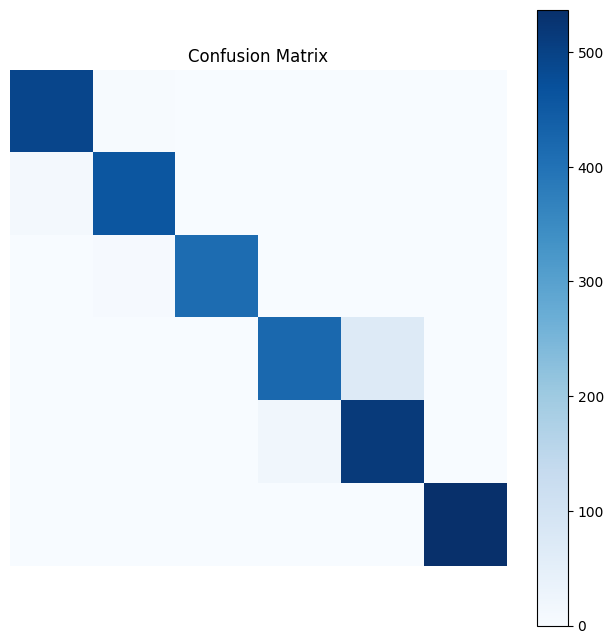

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Let's define the parameters to be tuned
parameters = {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(4, 15, 2)}

# Let's initiate the model
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=parameters, n_jobs=-1)
rfc_grid_results = rfc_grid.fit(X_train, y_train)

# Printing the best attributes of the model
print("Best Parameters: ", rfc_grid_results.best_params_)
print("Best Estimator: ", rfc_grid_results.best_estimator_)
print("Best Score: ", rfc_grid_results.best_score_)

# Perform predictions on the test set
y_pred = rfc_grid_results.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.axis('off')
plt.show()


### Let's compare all the models together

In [54]:
# Logistic Regression
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results.best_score_ * 100,
                                                          100 - (log_reg_grid_results.best_score_ * 100)))
# Decision Tree
print('Decision Tree       : {:.04}%      {:.04}% '.format(dtree_grid_results.best_score_ * 100,
                                                            100 - (dtree_grid_results.best_score_ * 100)))

# Random Forest
print('Random Forest       : {:.04}%       {:.04}% '.format(rfc_grid_results.best_score_ * 100,
                                                             100 - (rfc_grid_results.best_score_ * 100)))




                     Accuracy     Error
                     ----------   --------
Logistic Regression : 98.38%      1.619%
Decision Tree       : 98.3%      1.7% 
Random Forest       : 98.6%       1.401% 


In [56]:
# Load the test dataset
test_data = pd.read_csv('./UCI_HAR_Dataset/csv_files/test.csv')

# Preprocess the test data (drop unnecessary columns and apply LDA transformation)
X_test = test_data.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
X_test_transformed = lda.transform(X_test)

# Predict output labels using Logistic Regression
log_reg_pred = log_reg_grid_results.predict(X_test_transformed)

# Predict output labels using Decision Tree
dtree_pred = dtree_grid_results.predict(X_test_transformed)

# Predict output labels using Random Forest
rfc_pred = rfc_grid_results.predict(X_test_transformed)

# Mapping activity labels to activity names
activity_mapping = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Transform predicted labels into activity names for Logistic Regression
log_reg_pred_activity = [activity_mapping[label] for label in log_reg_pred]

# Transform predicted labels into activity names for Decision Tree
dtree_pred_activity = [activity_mapping[label] for label in dtree_pred]

# Transform predicted labels into activity names for Random Forest
rfc_pred_activity = [activity_mapping[label] for label in rfc_pred]

# Now you have the predicted activity names for each model:
# log_reg_pred_activity, dtree_pred_activity, rfc_pred_activity


print("log" , log_reg_pred_activity)
print("dec" , dtree_pred_activity)
print("rfc",rfc_pred_activity)


log ['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING', 'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALK

## Conclusion

The above table shows that Logistic Regression, Decision Tree & Random Forest has highest Accuracy with lowest Error value. We can use any of these three models for future predictions